# Phase diff of incoming tilted,shifted Gaussian on local Gaussian for inf. half-plane PD

\begin{equation}	
		\sum_{n,m} u_{nm}(x,y,z)=
			\left[
				1+
				i \frac{ \pi a \alpha}{ \lambda}
			\right]
			u_{00}
			+
			\left[
			\frac{a}{w_{0}}		
			+
			i  \frac{\pi w_{0} \alpha}{\lambda}	
			\right]			
			u_{10}
			+
			i  
				\frac{\sqrt{2} \pi a \alpha}{ \lambda}
			u_{20}	 
\end{equation}

In [2]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfi as erfi
pi=np.pi

### input

In [35]:
#spot, wavelength, shift
w= 1e-3
lam= 1064e-9
a = 100e-6  #100 micron shift

#alpha(10nrad)
alpha_min=-1000e-6
alpha_max=1000e-6
num_points = 1000
alpha = np.linspace(alpha_min,alpha_max,num = num_points)

## PLOT SCALES AND LABELS
micro = 10**(6)
nano = 10**(9)
cycle = 1/(2*pi)
rad = 1
xlab = 'u'
ylab = 'rad'

##SET SCALES
alpha_scale = micro
phase_scale = rad

if(alpha_scale==nano):
    xlab = 'n'
if(phase_scale==cycle):
    ylab = 'cycles'

### phase diff vs. angle

# Phase diff of incoming tilted,shifted Gaussian on local Gaussian for inf. half-plane PD

The phase difference:

\begin{align*}
	\Delta \phi = &
		 \frac{1}{2} 
		 \left[
		 	\phi_R - \phi_L
		 \right]
		 \\ = &       
		 \frac{1}{2}
		 \left[
						\arctan
				\big(
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						+
						\frac{\sqrt{2 \pi }  w_{0} }{2}
					\right]}					
				{1
				+
				 \frac{\sqrt{2 \pi}a}{2 w_{0}}}
				\big)
		-
			\arctan
				\big(
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						-
						\frac{\sqrt{2 \pi }  w_{0} }{2}
					\right]}					
				{1
				-
				 \frac{\sqrt{2 \pi}a}{2 w_{0}}}
				\big)	
			\right]	
\end{align*}

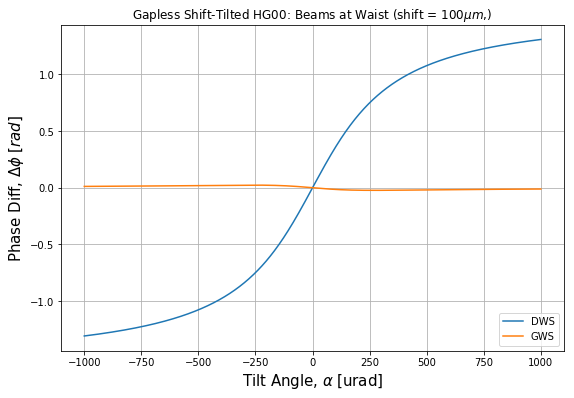

In [75]:
#function    
def phase_diff(alpha):
    phase_result=(0.50*(phi_r(alpha)-phi_l(alpha) ))
    return(phase_result)

def gws(alpha):
    gws_result=(0.50*(phi_r(alpha)+phi_l(alpha) ))
    return(gws_result)

def phi_r(alpha):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2*pi)*w/2
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2*pi)*a/(2*w)
                    )
            )
    )

def phi_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2*pi)*w/2
                )
            )  
                /
                (
                    1
                    -
                    np.sqrt(2*pi)*a/(2*w)
                )
        )
    )

     

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, phase_diff(alpha), label='DWS') 
plt.plot(alpha*alpha_scale, gws(alpha), label='GWS') 

plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'Gapless Shift-Tilted HG00: Beams at Waist (shift = 100$\mu m$,)') 
plt.grid() 
plt.savefig("tilt-shift-waist.pdf")



### Computed Deriv. (just checking the previous)
$\frac{d \Delta \phi}{d \alpha}$

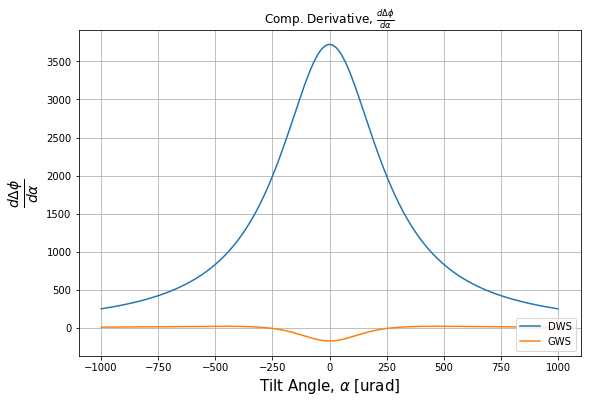

In [76]:
#function
comp_phase_diff_deriv = np.diff(phase_diff(alpha)) / np.diff(alpha)
comp_dws_deriv = np.diff(gws(alpha)) / np.diff(alpha)
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv*phase_scale, label='DWS') 
plt.plot(alpha2*alpha_scale, comp_dws_deriv*phase_scale, label='GWS')
plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'Comp. Derivative, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
plt.savefig("tilt-shift-waist-DER.pdf")